<a href="https://colab.research.google.com/github/JoseLuiz432/CarbonFootprintML/blob/main/CarbonFootprintML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The objective of this notebook is to delve into the dataset sourced from [Kragle](https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation) which focuses on individual carbon footprint calculation. Our aim is to develop a predictive model using TensorFlow, a powerful machine learning framework, to estimate carbon footprints based on various independent variables. Through this exploration and modeling endeavor, we seek to gain insights into the factors influencing carbon footprints and contribute to the understanding of individual-level environmental impact. This project aligns with the broader goal of leveraging machine learning techniques to address sustainability challenges and promote eco-conscious decision-making.

In [1]:
! pip install scikeras

In [79]:
# import package
import tensorflow as tf
import keras as K
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

## Data Download and Overview

1. First you need to download and unzip the file into colab

In [11]:
df = pd.read_csv("Carbon Emission.csv")
df.head(5)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


## Preprocessing the data

In [36]:
df.replace(np.nan, None)

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,None,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,None,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,None,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,None,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


## Exploratory Data Analysis

In [45]:
independent_variables = df.drop(columns=["CarbonEmission"])
dependent_variable = df["CarbonEmission"]

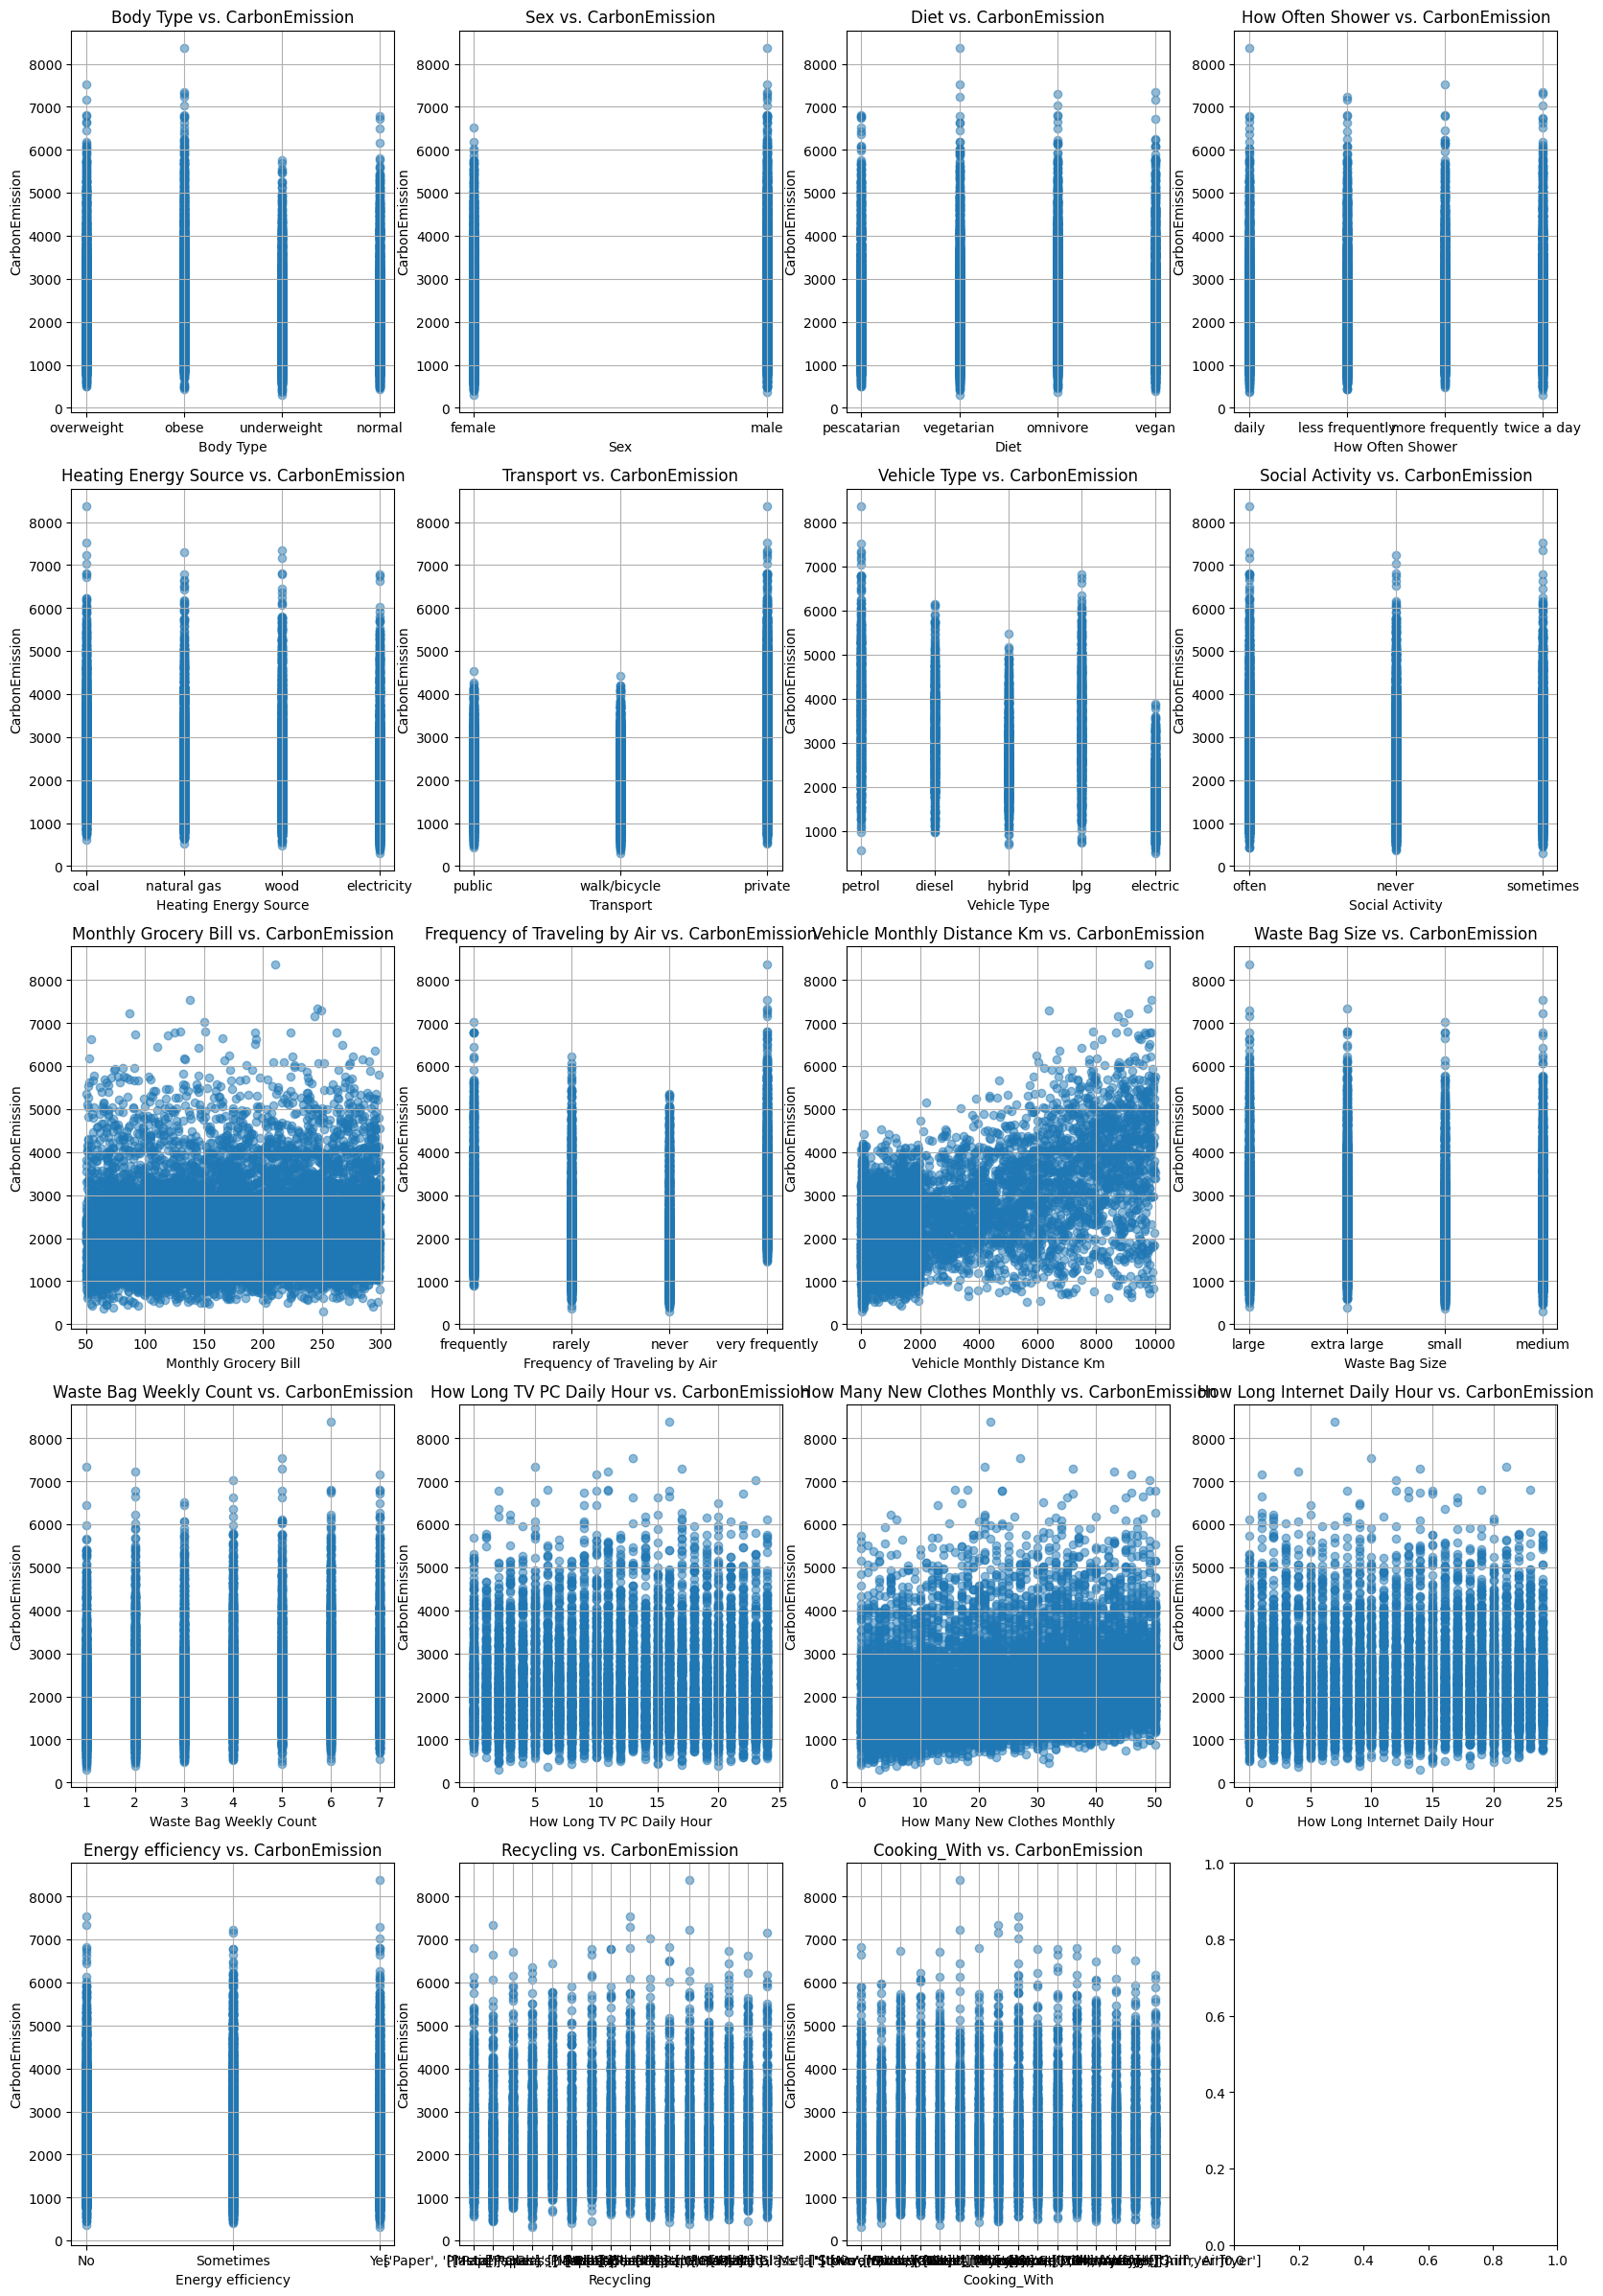

In [44]:
fix, axs = plt.subplots(5, 4, figsize=(20, 30))
for e, column in enumerate(independent_variables.columns):
  if isinstance(df[column].dtype, np.int64):
    axs[e // 4, e % 4].scatter(df[column], df["CarbonEmission"])
  else:
    axs[e // 4, e % 4].scatter(df[column].dropna(), df.dropna(subset=column)["CarbonEmission"], alpha=0.5)
  axs[e // 4, e % 4].set_title(f"{column} vs. CarbonEmission")
  axs[e // 4, e % 4].set_xlabel(column)
  axs[e // 4, e % 4].set_ylabel("CarbonEmission")
  axs[e // 4, e % 4].grid(True)
plt.show()

## Preprocessing the data

1. Preprocessing the data to fix columns types.

In [77]:
import ast

In [78]:
df['Recycling'] = df['Recycling'].apply(lambda x: ast.literal_eval(x))
df['Cooking_With'] = df['Cooking_With'].apply(lambda x: ast.literal_eval(x))

## Split the data in training and testing

## Data Transform

1. Normalization or Standarlization
2. OneHotEncode


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

class MultiHotEncoder(TransformerMixin, BaseEstimator):
  """Wraps `MultiLabelBinarizer` in a form that can work with `ColumnTransformer`. Note
  that input X has to be a `pandas.DataFrame`.
  """
  def __init__(self):
    self.mlbs = list()
    self.n_columns = 0
    self.categories_ = self.classes_ = list()


  def fit(self, X, y=None):
    for i in range(X.shape[1]): # X can be of multiple columns
        mlb = MultiLabelBinarizer()
        mlb.fit(X.iloc[:,i])
        self.mlbs.append(mlb)
        self.classes_.append(mlb.classes_)
        self.n_columns += 1
    return self

  def transform(self, X):
    if self.n_columns == 0:
        raise ValueError('Please fit the transformer first.')
    if self.n_columns != X.shape[1]:
        raise ValueError(f'The fit transformer deals with {self.n_columns} columns '
                          f'while the input has {X.shape[1]}.'
                        )
    result = list()
    for i in range(self.n_columns):
        result.append(self.mlbs[i].transform(X.iloc[:,i]))

    result = np.concatenate(result, axis=1)
    return result

  # def fit_transform(self, X, y=None):
  #     self.fit(X)
  #     return self.transform(X)

In [126]:
ct = make_column_transformer(
    (MinMaxScaler(), [
        'Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count',
        'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour']),
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False), [
        'Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source',
        'Transport', 'Vehicle Type', 'Social Activity', 'Frequency of Traveling by Air',
        'Waste Bag Size', 'Energy efficiency']),
    (MultiHotEncoder(), ['Cooking_With', 'Recycling'])
)

In [ ]:
ct.fit(df)